In [13]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt

Training Data - First 5 Rows:
   id  CustomerId  Surname  CreditScore Geography Gender   Age  Tenure  \
0   0  15672983.0     Ives        671.0   Germany   Male  33.0     8.0   
1   1  15617304.0  Ojiofor        663.0    France   Male  29.0     7.0   
2   2  15787026.0      Lai        710.0    France   Male  32.0     1.0   
3   3  15593365.0  Yobachi        686.0    France   Male  52.0     9.0   
4   4  15693637.0    Rizzo        675.0    France   Male  42.0     6.0   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0  102994.04            1.0        1.0             1.0        176471.78   
1       0.00            2.0        0.0             0.0        161807.17   
2       0.00            2.0        1.0             0.0         44001.11   
3   82596.80            1.0        0.0             0.0        125111.71   
4  129968.67            1.0        1.0             1.0         70563.90   

   Exited  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     1.0  

T

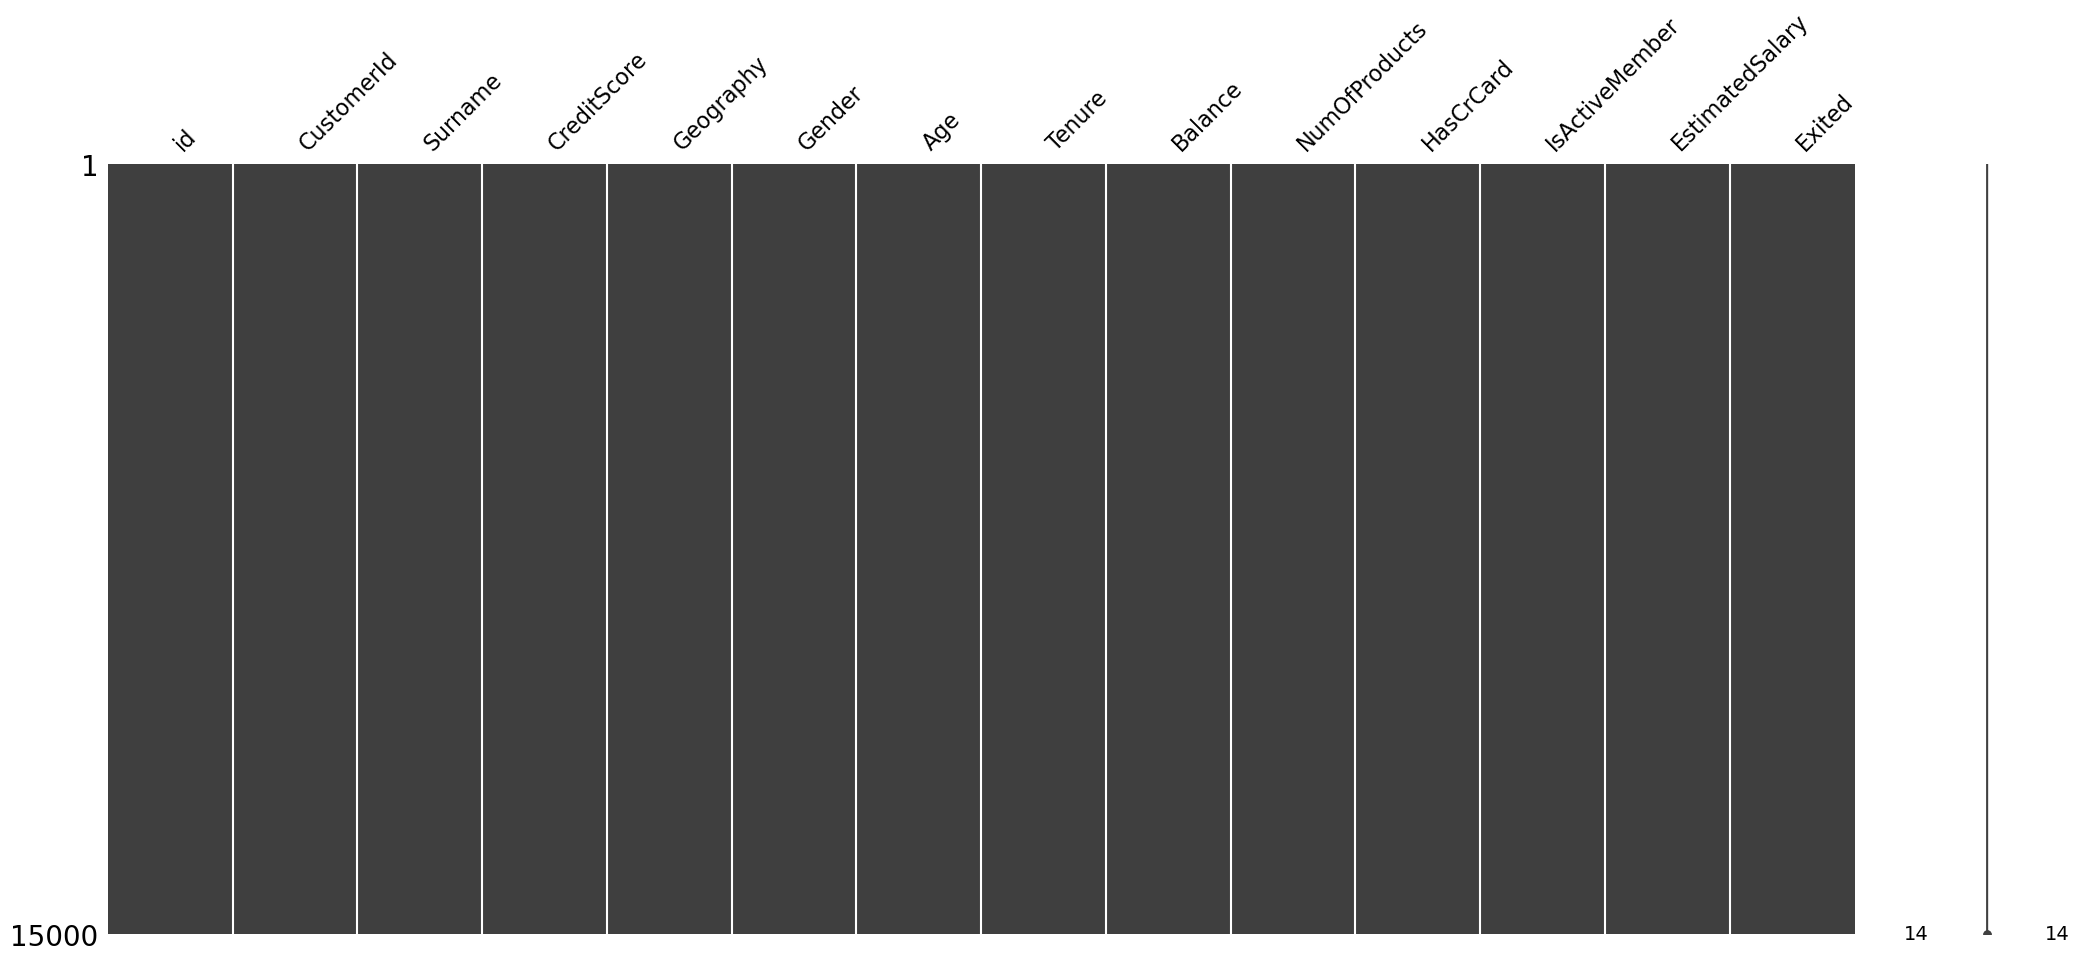

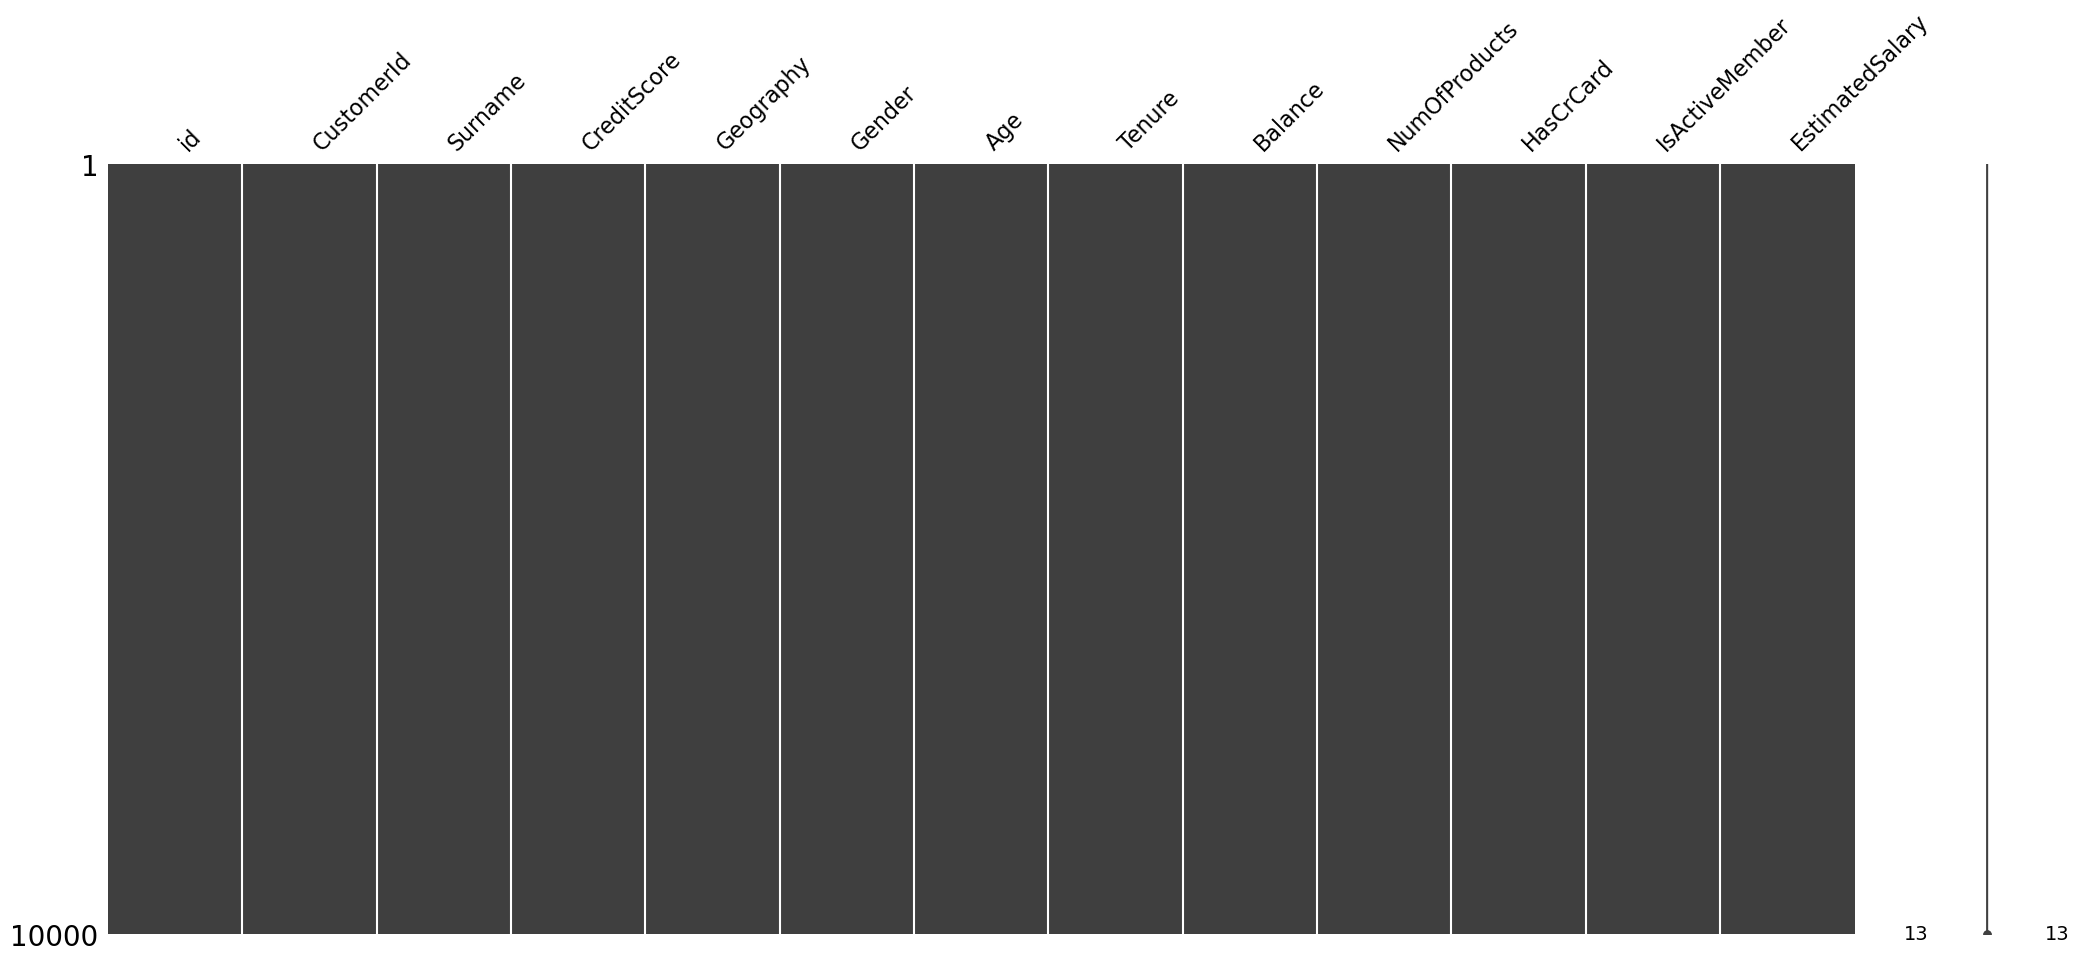

In [14]:
# Load datasets
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')

# Display first 5 rows
print("Training Data - First 5 Rows:")
print(train_df.head())

print("\nTesting Data - First 5 Rows:")
print(test_df.head())

# Check shape
print(f"\nTraining Data Shape: {train_df.shape}")
print(f"Testing Data Shape: {test_df.shape}")

# Columns
print("\nTraining Data Columns:")
print(train_df.columns)

print("\nTesting Data Columns:")
print(test_df.columns)

# Info
print("\nTraining Data Info:")
print(train_df.info())

print("\nTesting Data Info:")
print(test_df.info())

# Summary statistics
print("\nTraining Data Summary Statistics:")
print(train_df.describe())

print("\nTesting Data Summary Statistics:")
print(test_df.describe())

# Missing values
print("\nMissing Values in Training Data:")
print(train_df.isnull().sum())

print("\nMissing Values in Testing Data:")
print(test_df.isnull().sum())

# Data types
print("\nData Types in Training Data:")
print(train_df.dtypes)

print("\nData Types in Testing Data:")
print(test_df.dtypes)

# Visualize missing data
msno.matrix(train_df)
plt.show()

msno.matrix(test_df)
plt.show()

In [15]:
class KNN:
    def __init__(self, distance_metric='euclidean'):
        self.distance_metric = distance_metric
        self.X_train = None
        self.y_train = None
        self.distances = None
        self.sorted_indices = None

    def fit(self, X, y):
        """
        Store the training data and labels.
        X: training data (numpy array)
        y: labels for training data (numpy array)
        """
        self.X_train = X
        self.y_train = y

    def precompute_distances(self, X_test):
        """
        Precompute the distances between each test point and all training samples.
        X_test: input test data (numpy array)
        """
        self.distances = np.zeros((X_test.shape[0], self.X_train.shape[0]))

        # Compute distances from each test point to each training point
        for i, x_test in enumerate(X_test):
            for j, x_train in enumerate(self.X_train):
                self.distances[i, j] = self.compute_distance(x_test, x_train)
        
        # Store the indices of the sorted distances (smallest to largest)
        self.sorted_indices = np.argsort(self.distances, axis=1)

    def predict(self, k):
        """
        Predict the probability for class 1 for each test sample based on precomputed distances.
        k: number of neighbors to consider
        return: predicted probabilities for class 1 (numpy array)
        """
        probabilities = []
        for i in range(self.distances.shape[0]):
            # Get the indices of the k nearest neighbors
            k_nearest_indices = self.sorted_indices[i, :k]

            # Get the labels of the k nearest neighbors
            k_nearest_labels = self.y_train[k_nearest_indices]

            # Calculate the probability for class 1
            probability = self._calculate_probability(k_nearest_labels)
            probabilities.append(probability)

        return np.array(probabilities)

    def compute_distance(self, X1, X2):
        """
        Compute the distance between two samples X1 and X2.
        Supports 'euclidean' and 'manhattan' distance metrics.
        X1: first sample (numpy array)
        X2: second sample (numpy array)
        return: distance (float)
        """
        if self.distance_metric == 'euclidean':
            # Euclidean distance: sqrt(sum((x1 - x2)^2))
            distance = np.sqrt(np.sum((X1 - X2) ** 2))
        elif self.distance_metric == 'manhattan':
            # Manhattan distance: sum(|x1 - x2|)
            distance = np.sum(np.abs(X1 - X2))
        else:
            raise ValueError("Unsupported distance metric")
        
        return distance

    def _calculate_probability(self, labels):
        """
        Calculate the probability of exited based on the k nearest neighbors' labels.
        labels: list of labels (numpy array or Python list)
        return: probability of exited
        """
        # Count the number of neighbors with label exited
        count_class_exited = sum(labels)
        
        # Return the proportion of neighbors that are class 1
        probability_class_exited = count_class_exited / len(labels)
        
        return probability_class_exited

# Example usage:
# X_train = np.array([[1, 2], [2, 3], [3, 4], [5, 6]])
# y_train = np.array([0, 0, 1, 1])
# X_test = np.array([[1.5, 2.5], [4, 5]])

# knn = KNN(k=3, distance_metric='euclidean')
# knn.fit(X_train, y_train)
# predictions = knn.predict(X_test)
# print(predictions)


In [16]:
def preprocess_data(train_path, test_path):
    # Load train and test data using pandas
    print("Loading train and test data...")
    train_data = pd.read_csv(train_path)
    test_data = pd.read_csv(test_path)
    train_data = train_data.drop(['id', 'CustomerId', 'Surname'], axis=1)
    test_data = test_data.drop(['id', 'CustomerId', 'Surname'], axis=1)
    print(f"Train data shape: {train_data.shape}")
    print(f"Test data shape: {test_data.shape}")

    # Separate the target variable
    print("Separating target variable...")
    y_train = train_data['Exited'].values
    X_train = train_data.drop(columns=['Exited'])
    X_test = test_data

    # Identify numerical and categorical columns
    print("Identifying numerical and categorical columns...")
    numerical_cols = X_train.select_dtypes(include=['float64', 'int64']).columns
    categorical_cols = X_train.select_dtypes(include=['object']).columns
    print(f"Numerical columns: {list(numerical_cols)}")
    print(f"Categorical columns: {list(categorical_cols)}")

    # Also identify numerical columns that should be treated as categorical (binary columns)
    print("Identifying binary numerical columns (0 and 1 only)...")
    binary_cols = [col for col in numerical_cols if set(X_train[col].unique()) == {0, 1}]
    print(f"Binary columns: {binary_cols}")
    
    categorical_cols = categorical_cols.append(pd.Index(binary_cols))
    numerical_cols = numerical_cols.difference(binary_cols)
    print(f"Updated numerical columns: {list(numerical_cols)}")
    print(f"Updated categorical columns: {list(categorical_cols)}")

    # Standardize numerical columns (mean = 0, std = 1)
    if not numerical_cols.empty:
        print("Standardizing numerical columns...")
        X_train[numerical_cols] = (X_train[numerical_cols] - X_train[numerical_cols].mean()) / X_train[numerical_cols].std()
        X_test[numerical_cols] = (X_test[numerical_cols] - X_test[numerical_cols].mean()) / X_test[numerical_cols].std()
        print("Numerical columns standardized.")

    # One-hot encode categorical columns
    print("One-hot encoding categorical columns...")
    X_train_encoded = pd.get_dummies(X_train, columns=categorical_cols)
    X_test_encoded = pd.get_dummies(X_test, columns=categorical_cols)
    print("Categorical columns one-hot encoded.")

    # Convert boolean values (from get_dummies) to 0 and 1 only for new one-hot encoded columns
    one_hot_cols = X_train_encoded.columns.difference(X_train.columns)
    print("Converting boolean values to integers (0 and 1) for one-hot encoded columns...")
    X_train_encoded[one_hot_cols] = X_train_encoded[one_hot_cols].astype(int)
    X_test_encoded[one_hot_cols] = X_test_encoded[one_hot_cols].astype(int)
    print("Boolean values converted.")
    
    # Ensure train and test have the same columns after one-hot encoding
    print("Aligning train and test data after one-hot encoding...")
    X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)
    print("Train and test data aligned.")

    # Print the total count of each one-hot encoded category
    print("\nTotal count of each one-hot encoded category in X_train:")
    one_hot_counts = X_train_encoded.sum()
    print(one_hot_counts)

    print(f"Preprocessing complete. X_train shape: {X_train_encoded.shape}, X_test shape: {X_test_encoded.shape}")
    print("\nProcessed training Data - First 5 Rows:")
    print(X_train_encoded.head())

    print("\nOutput - First 5 Rows:")
    print(X_train_encoded.values[:5])
    
    return X_train_encoded.values, y_train, X_test_encoded.values

# Example usage:
# X_train_processed, y_train, X_test_processed = preprocess_data('./data/train.csv', './data/test.csv')


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def cross_validate(X, y, knn, k_values, n_splits=5):
    """
    Perform cross-validation on the given data and KNN classifier, experimenting with different values of k.
    
    Parameters:
    - X: Feature matrix (numpy array or pandas DataFrame)
    - y: Target array (numpy array or pandas Series)
    - knn: Instance of the KNN classifier
    - k_values: List of k values to experiment with
    - n_splits: Number of splits (folds) for cross-validation
    
    Returns:
    - A dictionary with k as keys and mean values of accuracy, precision, recall, F1 score, and AUC for each k
    """
    # Ensure X and y are numpy arrays
    if isinstance(X, pd.DataFrame):
        X = X.values
    if isinstance(y, pd.Series):
        y = y.values

    # Shuffle the data randomly
    np.random.seed(42)  # For reproducibility
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    X = X[indices]
    y = y[indices]

    # Determine the size of each fold
    fold_size = X.shape[0] // n_splits

    # Initialize result containers for all metrics
    results = {k: {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'auc': []} for k in k_values}

    # Perform cross-validation
    for i in range(n_splits):
        # Define the test and training indices for the current fold
        test_indices = indices[i * fold_size: (i + 1) * fold_size]
        train_indices = np.concatenate([indices[:i * fold_size], indices[(i + 1) * fold_size:]])

        # Split the data into training and testing sets
        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]

        # Train the KNN model
        knn.fit(X_train, y_train)

        # Precompute distances once
        knn.precompute_distances(X_test)

        # For each k, predict and calculate all metrics
        for k in k_values:
            y_probs = knn.predict(k)
            y_pred = (y_probs >= 0.5).astype(int)

            # Compute True Positives, False Positives, True Negatives, False Negatives
            TP = np.sum((y_pred == 1) & (y_test == 1))
            FP = np.sum((y_pred == 1) & (y_test == 0))
            TN = np.sum((y_pred == 0) & (y_test == 0))
            FN = np.sum((y_pred == 0) & (y_test == 1))

            # Calculate accuracy, precision, recall, F1-score
            accuracy = (TP + TN) / (TP + TN + FP + FN)
            precision = TP / (TP + FP) if (TP + FP) > 0 else 0
            recall = TP / (TP + FN) if (TP + FN) > 0 else 0
            f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

            # Calculate AUC
            auc = compute_auc(y_test, y_probs)

            # Append the metrics for this fold
            results[k]['accuracy'].append(accuracy)
            results[k]['precision'].append(precision)
            results[k]['recall'].append(recall)
            results[k]['f1'].append(f1)
            results[k]['auc'].append(auc)

            print(f"Fold {i+1}, k={k}: Accuracy = {accuracy}, Precision = {precision}, Recall = {recall}, F1-score = {f1}, AUC = {auc}")

    # Compute the mean of all metrics for each k value
    mean_results = {k: {metric: np.mean(results[k][metric]) for metric in results[k]} for k in k_values}
    
    print("Mean results for each k:")
    for k in k_values:
        print(f"k={k}: Accuracy = {mean_results[k]['accuracy']}, Precision = {mean_results[k]['precision']}, "
              f"Recall = {mean_results[k]['recall']}, F1-score = {mean_results[k]['f1']}, AUC = {mean_results[k]['auc']}")

    return mean_results

def compute_auc(y_true, y_probs):
    """
    Compute the Area Under the ROC Curve (AUC) manually.
    Parameters:
    - y_true: True binary labels
    - y_probs: Predicted probabilities for class 1
    Returns:
    - AUC score
    """
    # Sort by predicted probabilities (descending)
    sorted_indices = np.argsort(-y_probs)
    y_true_sorted = y_true[sorted_indices]
    y_probs_sorted = y_probs[sorted_indices]

    # Compute True Positive Rate (TPR) and False Positive Rate (FPR)
    TPRs = []
    FPRs = []
    TP = 0
    FP = 0
    FN = np.sum(y_true == 1)
    TN = np.sum(y_true == 0)

    for i in range(len(y_true_sorted)):
        if y_true_sorted[i] == 1:
            TP += 1
            FN -= 1
        else:
            FP += 1
            TN -= 1

        TPR = TP / (TP + FN) if (TP + FN) > 0 else 0
        FPR = FP / (FP + TN) if (FP + TN) > 0 else 0

        TPRs.append(TPR)
        FPRs.append(FPR)

    # Compute AUC using the trapezoidal rule
    auc = np.trapz(TPRs, FPRs)

    return auc

def plot_auc_vs_k(k_values, mean_results):
    """
    Plot the mean AUC vs. number of neighbors (k).
    Parameters:
    - k_values: List of k values (number of neighbors)
    - mean_results: Dictionary with k as keys and mean AUC as values
    """
    # Extract the AUC values from the mean_results dictionary
    auc_values = [mean_results[k]['auc'] for k in k_values]

    # Plot the AUC vs. number of neighbors (k)
    plt.figure(figsize=(8, 6))
    plt.plot(k_values, auc_values, marker='o', linestyle='-', color='b', label='Mean AUC')
    plt.title('Mean AUC vs. Number of Neighbors (k)')
    plt.xlabel('Number of Neighbors (k)')
    plt.ylabel('Mean AUC')
    plt.grid(True)
    plt.legend()
    plt.show()



# Example usage:
# knn = KNN(distance_metric='euclidean')
# k_values = [3, 5, 7, 9, 11]  # Different values of k to experiment with
# mean_auc_results = cross_validate(X_train_processed, y_train, knn, k_values, n_splits=5)

# Plot the results
# plot_auc_vs_k(k_values, mean_auc_results)


In [18]:
# Load and preprocess data
X, y, X_test = preprocess_data('./data/train.csv', './data/test.csv')


Loading train and test data...
Train data shape: (15000, 11)
Test data shape: (10000, 10)
Separating target variable...
Identifying numerical and categorical columns...
Numerical columns: ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
Categorical columns: ['Geography', 'Gender']
Identifying binary numerical columns (0 and 1 only)...
Binary columns: ['HasCrCard', 'IsActiveMember']
Updated numerical columns: ['Age', 'Balance', 'CreditScore', 'EstimatedSalary', 'NumOfProducts', 'Tenure']
Updated categorical columns: ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']
Standardizing numerical columns...
Numerical columns standardized.
One-hot encoding categorical columns...
Categorical columns one-hot encoded.
Converting boolean values to integers (0 and 1) for one-hot encoded columns...
Boolean values converted.
Aligning train and test data after one-hot encoding...
Train and test data aligned.

Total count of each one-hot 

In [19]:
# Create and evaluate model
knn_eu = KNN(distance_metric='euclidean')
k_values_eu = list(range(1, 31))  # Different values of k to experiment with
mean_auc_results_eu = cross_validate(X, y, knn_eu, k_values_eu, n_splits=5)

Fold 1, k=1: Accuracy = 0.8453333333333334, Precision = 0.6169491525423729, Recall = 0.6046511627906976, F1-score = 0.610738255033557, AUC = 0.7476350724163824
Fold 1, k=2: Accuracy = 0.83, Precision = 0.5562347188264058, Recall = 0.7558139534883721, F1-score = 0.6408450704225352, AUC = 0.8257060839736324
Fold 1, k=3: Accuracy = 0.8696666666666667, Precision = 0.7024952015355086, Recall = 0.6079734219269103, F1-score = 0.6518254674977738, AUC = 0.8509596867821745
Fold 1, k=4: Accuracy = 0.8656666666666667, Precision = 0.6542635658914728, Recall = 0.7009966777408638, F1-score = 0.6768243785084203, AUC = 0.8673209124990648
Fold 1, k=5: Accuracy = 0.881, Precision = 0.7445109780439122, Recall = 0.6196013289036545, F1-score = 0.6763372620126926, AUC = 0.8743207933521566
Fold 1, k=6: Accuracy = 0.876, Precision = 0.697594501718213, Recall = 0.6744186046511628, F1-score = 0.6858108108108107, AUC = 0.8810733750994044
Fold 1, k=7: Accuracy = 0.8833333333333333, Precision = 0.7550607287449392, 

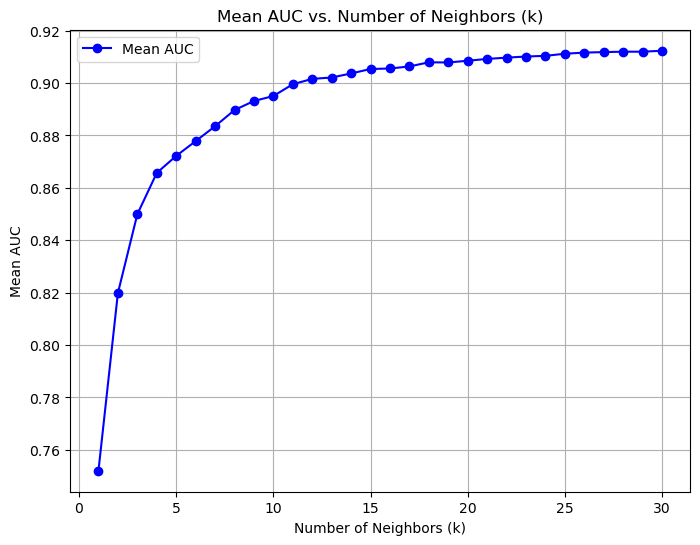

In [20]:
# Plot the results
plot_auc_vs_k(k_values_eu, mean_auc_results_eu)

In [21]:
# Create and evaluate model
knn_ma = KNN(distance_metric='manhattan')
k_values_ma = list(range(1, 31))  # Different values of k to experiment with
mean_auc_results_ma = cross_validate(X, y, knn_ma, k_values_ma, n_splits=5)

Fold 1, k=1: Accuracy = 0.8476666666666667, Precision = 0.6235093696763203, Recall = 0.6079734219269103, F1-score = 0.6156433978132885, AUC = 0.756785139332611
Fold 1, k=2: Accuracy = 0.831, Precision = 0.5587144622991347, Recall = 0.7508305647840532, F1-score = 0.6406803685329553, AUC = 0.8189500386534736
Fold 1, k=3: Accuracy = 0.866, Precision = 0.7032520325203252, Recall = 0.574750830564784, F1-score = 0.6325411334552102, AUC = 0.8471580691550822
Fold 1, k=4: Accuracy = 0.8623333333333333, Precision = 0.6512, Recall = 0.6760797342192691, F1-score = 0.6634066829665851, AUC = 0.862733756535762
Fold 1, k=5: Accuracy = 0.8796666666666667, Precision = 0.7474332648870636, Recall = 0.6046511627906976, F1-score = 0.6685032139577594, AUC = 0.8746158897641723
Fold 1, k=6: Accuracy = 0.8806666666666667, Precision = 0.7140350877192982, Recall = 0.6760797342192691, F1-score = 0.6945392491467576, AUC = 0.8798645881534723
Fold 1, k=7: Accuracy = 0.879, Precision = 0.7484407484407485, Recall = 0.5

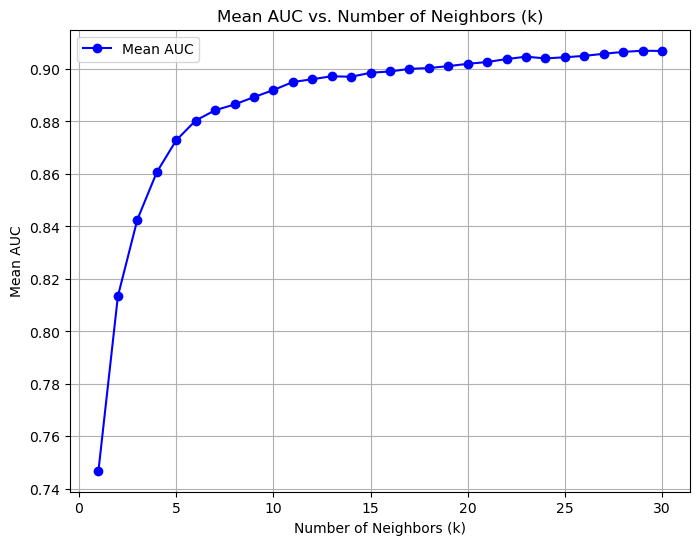

In [22]:
plot_auc_vs_k(k_values_ma, mean_auc_results_ma)

In [23]:
# Load and preprocess data
X, y, X_test = preprocess_data('./data/train.csv', './data/test.csv')

Loading train and test data...
Train data shape: (15000, 11)
Test data shape: (10000, 10)
Separating target variable...
Identifying numerical and categorical columns...
Numerical columns: ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
Categorical columns: ['Geography', 'Gender']
Identifying binary numerical columns (0 and 1 only)...
Binary columns: ['HasCrCard', 'IsActiveMember']
Updated numerical columns: ['Age', 'Balance', 'CreditScore', 'EstimatedSalary', 'NumOfProducts', 'Tenure']
Updated categorical columns: ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']
Standardizing numerical columns...
Numerical columns standardized.
One-hot encoding categorical columns...
Categorical columns one-hot encoded.
Converting boolean values to integers (0 and 1) for one-hot encoded columns...
Boolean values converted.
Aligning train and test data after one-hot encoding...
Train and test data aligned.

Total count of each one-hot 

In [24]:

# TODO: Train on full dataset with optimal hyperparameters and make predictions on test set
knn = KNN(distance_metric='euclidean')
k_values = 30  # Different values of k to experiment with
knn.fit(X, y)
knn.precompute_distances(X_test)
test_predictions = knn.predict(k_values)

# Save test predictions
pd.DataFrame({'id': pd.read_csv('./data/test.csv')['id'], 'Exited': test_predictions}).to_csv('./output/submissions.csv', index=False)

In [25]:
test_predictions.shape

(10000,)